In [379]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from src.mlp import MLP
from src.layer import Layer
from src.visualisation import plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Squares Large

In [317]:
df_training = pd.read_csv("data/mio1/regression/square-large-training.csv", index_col=0)
df_test = pd.read_csv("data/mio1/regression/square-large-test.csv", index_col=0)

x_train = df_training['x'].values.reshape(1, len(df_training))
y_train = df_training['y'].values.reshape(1, len(df_training))

x_test = df_test['x'].values.reshape(1, len(df_test))
y_test = df_test['y'].values.reshape(1, len(df_test))

y_max = np.max(y_train)
y_min = np.min(y_train)
y_train_normalised = (y_train - y_min) / (y_max - y_min)

In [364]:
model = MLP(layers=[
    Layer(1, 10, activation_name="sigmoid"),
    Layer(10, 10, activation_name="sigmoid"),
    Layer(10, 1, activation_name="linear")
])
total_loss_squares_large = []

In [ ]:
loss = model.fit(x_train, y_train_normalised, learning_rate=0.001, epochs=10, verbose=1, batch_size=25)
total_loss_squares_large.extend(loss)

**Loss history**

<Axes: >

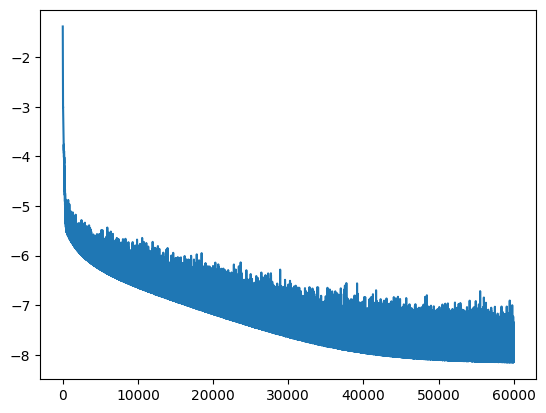

In [372]:
sns.lineplot(np.log10(total_loss_squares_large[0:]))

**Model visualisation**

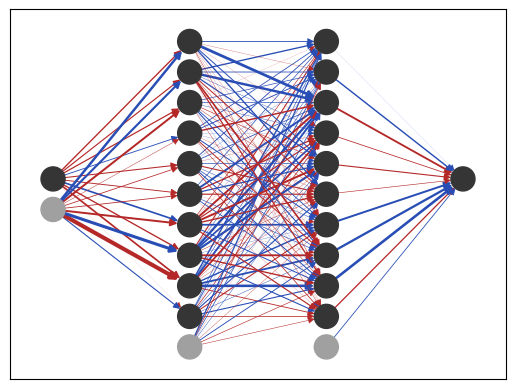

In [373]:
plot(model, log_weights=False)

**Training set MSE**

In [374]:
y_predicted_normalised = model.predict(x_train)

# denormalise
y_predicted = y_predicted_normalised * (y_max - y_min) + y_min
print(mean_squared_error(y_train, y_predicted))

0.0011289301436613916


**Test set MSE**

In [375]:
y_predicted_normalised = model.predict(x_test)

# denormalise
y_predicted = y_predicted_normalised * (y_max - y_min) + y_min
print(mean_squared_error(y_test, y_predicted))

1.0322497772650576


**Data visualisation**

<Axes: >

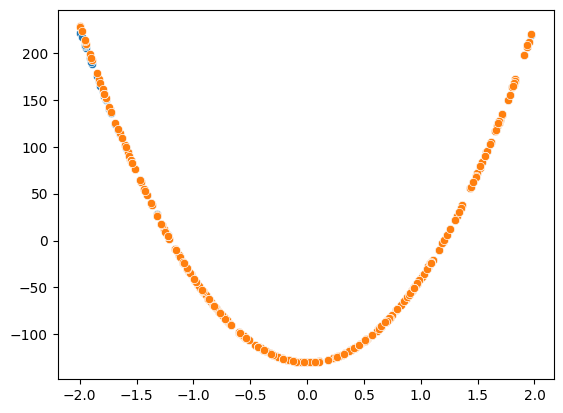

In [376]:
sns.scatterplot(x=x_test.reshape(len(df_test)),y=y_predicted.reshape(len(df_test)))
sns.scatterplot(x=x_test.reshape(len(df_test)),y=y_test.reshape(len(df_test)))

### Steps Large

In [382]:
df_training = pd.read_csv("data/mio1/regression/steps-large-training.csv", index_col=0)
df_test = pd.read_csv("data/mio1/regression/steps-large-test.csv", index_col=0)

x_train = df_training['x'].values.reshape(1, len(df_training))
y_train = df_training['y'].values.reshape(1, len(df_training))

x_test = df_test['x'].values.reshape(1, len(df_test))
y_test = df_test['y'].values.reshape(1, len(df_test))

y_max = np.max(y_train)
y_min = np.min(y_train)
y_train_normalised = (y_train - y_min) / (y_max - y_min)

In [406]:
model = MLP(layers=[
    Layer(1, 3, activation_name="sigmoid"),
    Layer(3, 1, activation_name="linear")
])
total_loss_steps_large = []

In [ ]:
loss = model.fit(x_train, y_train_normalised, learning_rate=0.004, epochs=40e3, verbose=1, batch_size=20)
total_loss_steps_large.extend(loss)

In [425]:
model.save_model("./models", "steps-large")

<Axes: >

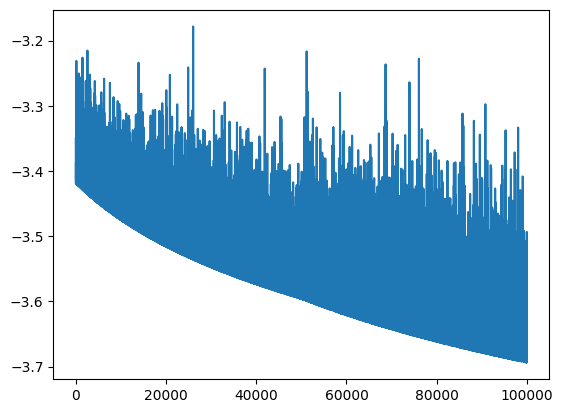

In [421]:
sns.lineplot(np.log10(total_loss_steps_large[0:]))

**Model visualisation**

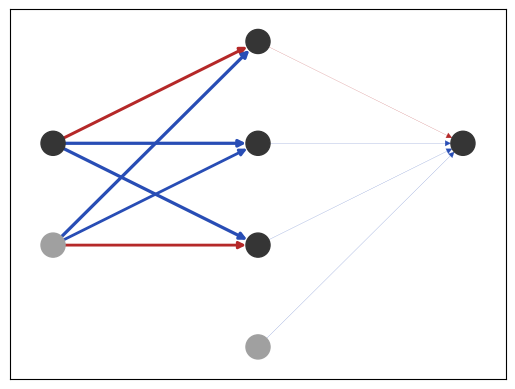

In [426]:
plot(model, log_weights=True)

**Training set MSE**

In [427]:
y_predicted_normalised = model.predict(x_train)

# denormalise
y_predicted = y_predicted_normalised * (y_max - y_min) + y_min
print(mean_squared_error(y_train, y_predicted))

11.716570824619904


**Test set MSE**

In [428]:
y_predicted_normalised = model.predict(x_test)

# denormalise
y_predicted = y_predicted_normalised * (y_max - y_min) + y_min
print(mean_squared_error(y_test, y_predicted))

9.549295789056522


**Data visualisation**

<Axes: >

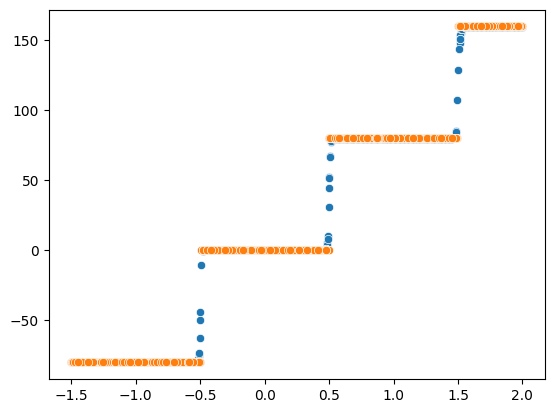

In [429]:
sns.scatterplot(x=x_test.reshape(len(df_test)),y=y_predicted.reshape(len(df_test)))
sns.scatterplot(x=x_test.reshape(len(df_test)),y=y_test.reshape(len(df_test)))

### Multimodal Large

In [269]:
df_training = pd.read_csv("data/mio1/regression/multimodal-large-training.csv")
df_test = pd.read_csv("data/mio1/regression/multimodal-large-test.csv")

x_train = df_training['x'].values.reshape(1, len(df_training))
y_train = df_training['y'].values.reshape(1, len(df_training))

x_test = df_test['x'].values.reshape(1, len(df_test))
y_test = df_test['y'].values.reshape(1, len(df_test))

y_max = np.max(y_train)
y_min = np.min(y_train)
y_train_normalised = (y_train - y_min) / (y_max - y_min)

In [310]:
model = MLP(layers=[
    Layer(1, 10, activation_name="sigmoid"),
    Layer(10, 10, activation_name="sigmoid"),
    Layer(10, 1, activation_name="linear")
])
total_loss_multimodal = []

In [311]:
loss = model.fit(x_train, y_train_normalised, learning_rate=0.1, epochs=2e3, verbose=1, batch_size=1000)
total_loss_multimodal.extend(loss)

epoch: 2000/2000.0	loss: 0.00020229010037728194
done! final loss: 0.00020229010037728194


<Axes: >

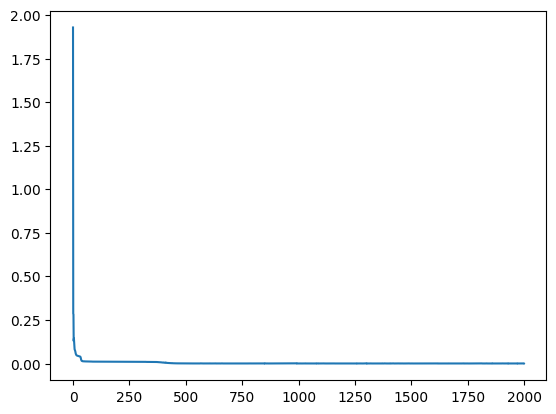

In [312]:
sns.lineplot(loss[0:])

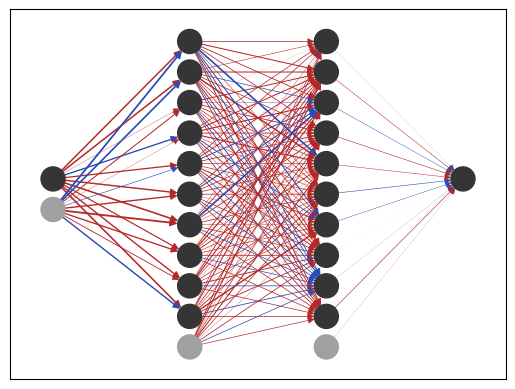

In [313]:
plot(model, log_weights=True)

**Training MSE**

In [314]:
y_predicted_normalised = model.predict(x_train)

# denormalise
y_predicted = y_predicted_normalised * (y_max - y_min) + y_min
print(mean_squared_error(y_train, y_predicted))

8.03621847008431


**Test MSE**

In [315]:
y_predicted_normalised = model.predict(x_test)

# denormalise
y_predicted = y_predicted_normalised * (y_max - y_min) + y_min
print(mean_squared_error(y_test, y_predicted))

3.9106651682655182


**Data Visualisation**

<Axes: >

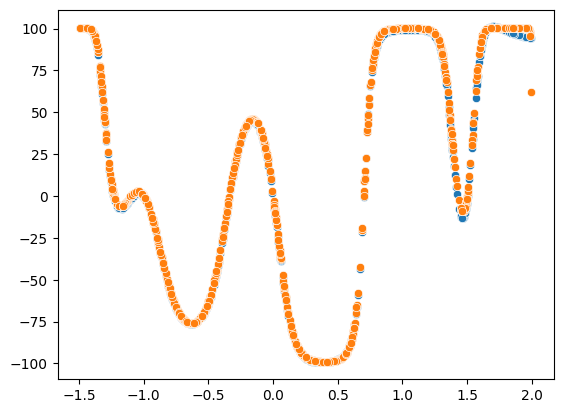

In [316]:
sns.scatterplot(x=x_test.reshape(len(df_test)),y=y_predicted.reshape(len(df_test)))
sns.scatterplot(x=x_test.reshape(len(df_test)),y=y_test.reshape(len(df_test)))